In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy as sp

# Interpolation

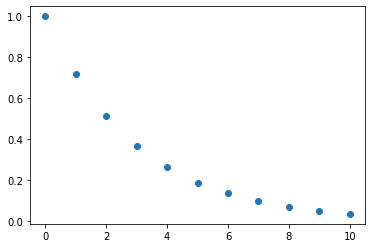

In [2]:
from scipy import interpolate

x = np.arange(0,11)
y = np.exp(-x/3.0)
plt.scatter(x,y)
plt.show()

In [3]:
f = interpolate.interp1d(x, y)

In [4]:
f(9.8)

array(0.03849661)

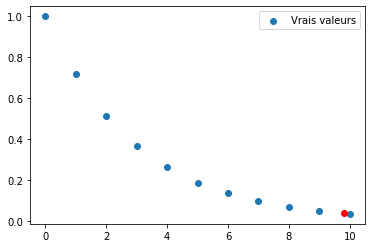

In [5]:
plt.scatter(x,y,label="Vrais valeurs")
plt.scatter(9.8,f(9.8),c="r")
plt.legend()
plt.show()

In [6]:
# L'interpolation ne fonctionne que sur l'interval initial
f(11)

ValueError: A value in x_new is above the interpolation range.

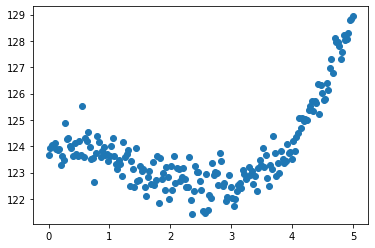

In [7]:
x = np.linspace(0,5,200)
y = 1/9*x**(3.20) - 4/7*x**2 + 124 + np.random.randn(x.shape[0])/2
plt.scatter(x,y)
plt.show()

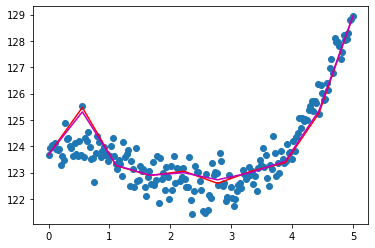

In [8]:
plt.scatter(x,y)
f=interpolate.interp1d(x,y, kind="quadratic")
plt.plot(np.linspace(0,5,10), f(np.linspace(0,5,10)), c='r')
f=interpolate.interp1d(x,y)
plt.plot(np.linspace(0,5,10), f(np.linspace(0,5,10)), c='m')
plt.show()

# Optimisation

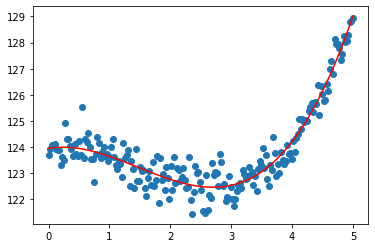

In [9]:
def f(x, a, b, c, d):
    return(a*x**3 + b*x**2 + c*x + d)

from scipy import optimize

param, mcov = optimize.curve_fit(f,x,y)

plt.scatter(x, y)
plt.plot(x, f(x, param[0], param[1], param[2], param[3]), c='r')

plt.show()

In [10]:
param

array([  0.2064643 ,  -0.90964449,   0.39925384, 123.94530742])

# Correlation

In [11]:
A = pd.DataFrame([[1,2,3,6],[2,6,9,14]]).T

In [12]:
A.columns=["a","b"]

In [13]:
A["a"].corr(A["b"])

0.9762179039528719

In [14]:
import scipy.stats as stats

In [15]:
# Ceci est un test de correlation renvoyant la valeur
# de la correlation et la p-value associée
stats.pearsonr(A["a"],A["b"])

(0.976217903952872, 0.023782096047128)

# Analyse de l'image

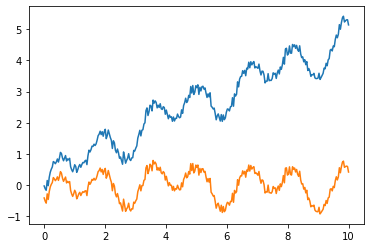

In [16]:
# Elimination de la tendance linéaire
from scipy import signal
x = np.linspace(0,10,300)
y = x/2 + np.sin(1/2*x)/4 + np.cos(2*x+4)/3 + np.sin(4*x)/2 + np.random.randn(x.shape[0])/10

new_y=signal.detrend(y)

plt.plot(x,y)
plt.plot(x,new_y)
plt.show()

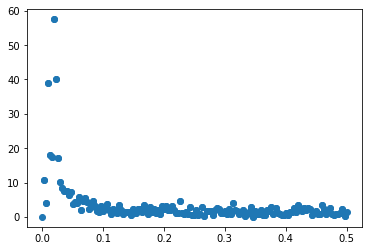

In [17]:
# Calcul des amplitudes et fréquences
from scipy import fft
fourrier = fft.fft(new_y)
power = np.abs(fourrier)
frequences = fft.fftfreq(new_y.size)
plt.scatter(np.abs(frequences), power)
plt.show()

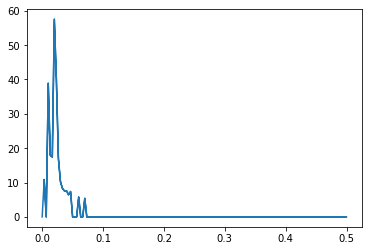

In [18]:
fourrier[power<5]=0
plt.plot(np.abs(frequences), np.abs(fourrier))
plt.show()

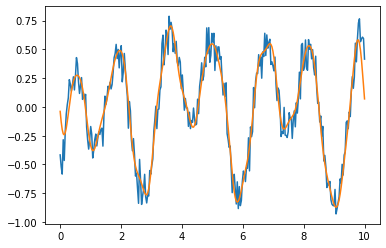

In [21]:
invFourrier = fft.ifft(fourrier)
plt.plot(x,new_y)
plt.plot(x,np.real(invFourrier))
plt.show()